In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df = pd.read_csv("/content/housing_price_dataset.csv")

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.drop('Address', axis=1, inplace=True)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [ ]:
# hyperparameter
param_grid = {'alpha':np.logspace(-3,3,7)}

In [ ]:
# lasso
lasso = GridSearchCV(Lasso(max_iter=10000),param_grid=param_grid,cv=5)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# ridge
ridge = GridSearchCV(Ridge(),param_grid,cv=5)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}) performance
r2 score: 0.92
mse: 10214257919.81


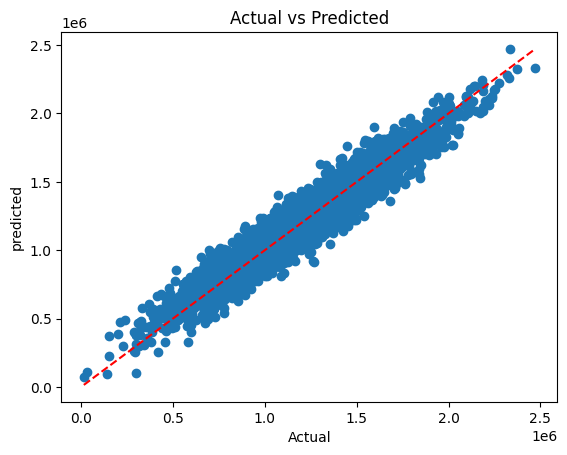


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}) performance
r2 score: 0.92
mse: 10205428341.72


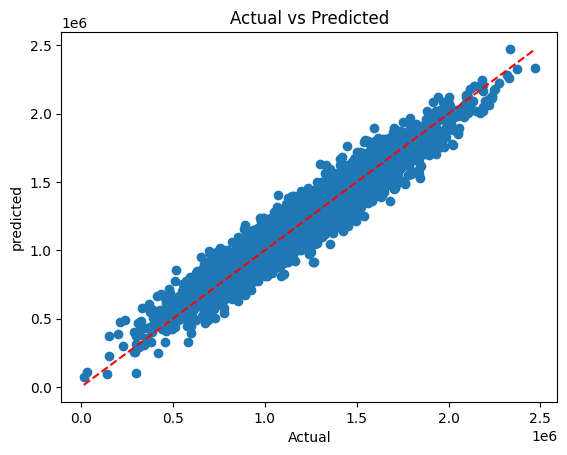

In [ ]:
# evaluation
def em(y_true,y_pred,model_name):
  print(f'\n{model_name} performance')
  print(f'r2 score: {r2_score(y_true,y_pred):.2f}')
  print(f'mse: {mean_squared_error(y_true,y_pred):.2f}')

  plt.scatter(y_true,y_pred)
  plt.xlabel("Actual")
  plt.ylabel("predicted")
  plt.title("Actual vs Predicted")
  plt.plot([min(y_true),max(y_true)],[min(y_true),max(y_true)],color='red',linestyle='dashed')
  plt.show()


em(y_test,y_pred_lasso,lasso)
em(y_test,y_pred_ridge,ridge)